# Project: Wrangling and Analyze Data

## Topics
 - **Introduction**
 
 - **Gathering data**
 
 - **Assessing data**
 
 - **Cleaning data**
 
 - **Storing data**
 
 - **Analyzing, and visualizing data**


### Introduction

Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) .
The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


#### We will import necessary libraries for this project

In [1]:
#we will import required libraries
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np
from tweepy import OAuthHandler
from timeit import default_timer as timer
from matplotlib import pyplot as plt
%matplotlib inline


## Data Gathering
In the cell below, we will gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#we will load the twitter-archive-enhanced.csv
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#we will use the Requests library to download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image-predictions.tsv', 'w') as file:
    file.write(response.text)
    
image_df = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
#we will get id, retweet_count, and favorite_count from text "tweet-json.txt" and put them in data frame call "tweet-json"

with open ('tweet-json.txt', encoding = "utf-8") as fp:
    df1 = pd.DataFrame(([json.loads(line) for line in fp.readlines()]), columns = ['id', 'favorite_count', 'retweet_count'])



In [6]:
#accessing the twitter_df
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
2047,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,None,None,None,None
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,None,None,pupper,None
112,870804317367881728,NaN,NaN,2017-06-03 00:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870804317...,11,10,None,None,None,None,None
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None


In [7]:
#accessing the image_df
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
491,675534494439489536,https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg,1,chow,0.749368,True,schipperke,0.133738,True,Newfoundland,0.049914,True
877,698342080612007937,https://pbs.twimg.com/ext_tw_video_thumb/69834...,1,boxer,0.883048,True,Saint_Bernard,0.030579,True,Staffordshire_bullterrier,0.012994,True
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True
1897,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,Yorkshire_terrier,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich_terrier,0.419838,True,cairn,0.351876,True,Norfolk_terrier,0.051094,True


In [8]:
#accessing the twitter_df information details
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#accessing the twitter_df for any duplicated values
twitter_df.duplicated().sum()

0

In [10]:
#accessing the image_df information details
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#accessing the image_df for any duplicated values
image_df.duplicated().sum()

0

In [12]:
#accessing the df1 information details
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
#accessing more details on twitter_df
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#accessing more details on image_df
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues


1. Unnecessary data in the source column.

2. Removing retweet rows that have non-empty rows.

3. Irrelevant columns in the dataframe. 

4. The name of the dog in some rows is indicated as `an`,`not`, `a`, `one`, `the`, `quite`, `all`.

5. Some row contains denominator rating of not equal to 10.

6. df1 primary key is represented by different name to the other datasets.

7. The indicators for missing values in the data varies NaN/None. 

8. Erroneous datatype.



### Tidiness issues
 
1. The columns doggo, puppo, pupper, floofer are in different columns.

2. Renaming the columns properly.

## Cleaning Data
In this section, we will clean **all** of the issues we've documented while assessing the data. 

**Note:** we will make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [15]:
#we will make copies of original pieces of data
twitter_df_clean = twitter_df.copy()
image_df_clean = image_df.copy()
df1_clean = df1.copy()


### Quality Issues

### Issue #1: Unnecessary data in the source column.

#### Define: 
We will extract unnecessary data from the `source column`.

#### Code

In [16]:
#The original data before any changes
twitter_df_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
#The code to extract unnecessary data in the column.
twitter_df_clean['source'] = twitter_df_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [18]:
#The code to view the data after changes
twitter_df_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #2: Removing retweet rows that have non-empty rows.

#### Define
We will remove the following columns; `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

#### Code

In [19]:
# removing retweet rows(status_id, status_user_id, status_timestamp) that have non-empty
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull()]
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_user_id.isnull()]
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_timestamp.isnull()]

#### Test

In [20]:
#The code to view the data after changes
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #3: Irrelevant columns in the dataframe.

### Define
We need to drop the following columns; `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`

### code

In [21]:
# Dropping irrelevant columns
twitter_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                      'retweeted_status_id', 'retweeted_status_user_id',
                       'retweeted_status_timestamp', 'expanded_urls'], axis = 1, inplace = True)

#### Test

In [22]:
#Confirm changes
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #4: The name of the dog in some rows is indicated as `an`,`not`, `a`, `one`, `the`, `quite`, `all`.

#### Define
We need to eliminate lowercase names such as(`an`,`not`, `a`, `one`, `the`, `quite`, `all`), uppercase names are the dogs name. 

#### Code

In [23]:
#The data before any changes
twitter_df_clean.query('name == "an" or name == "not" or name == "a" or name == "one" or name == "the" or name == "quite" or name == "all"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,2017-07-02 15:32:16 +0000,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,14,10,a,None,None,pupper,None
169,859196978902773760,2017-05-02 00:04:57 +0000,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,12,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22 +0000,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",12,10,quite,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57 +0000,Twitter Web Client,There's going to be a dog terminal at JFK Airp...,10,10,not,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17 +0000,Twitter for iPhone,"Occasionally, we're sent fantastic stories. Th...",14,10,one,None,None,None,None
649,792913359805018113,2016-10-31 02:17:31 +0000,Twitter for iPhone,Here is a perfect example of someone who has t...,13,10,a,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12 +0000,Twitter for iPhone,Guys this is getting so out of hand. We only r...,10,10,a,None,None,None,None
924,755206590534418437,2016-07-19 01:04:16 +0000,Twitter for iPhone,This is one of the most inspirational stories ...,14,10,one,doggo,None,None,None
988,748977405889503236,2016-07-01 20:31:43 +0000,Twitter for iPhone,What jokester sent in a pic without a dog in i...,10,10,not,None,None,None,None
993,748575535303884801,2016-06-30 17:54:50 +0000,Twitter for iPhone,This is one of the most reckless puppers I've ...,6,10,one,None,None,None,None


In [24]:
#we will remove the following words; "an","not", "a", "one", "the", "quite", "all".
# dogs name are represented by uppercase.
#in the twitter_df name column
    
mask = twitter_df_clean.name.str.islower() 
column_name = 'name' 
twitter_df_clean.loc[mask, column_name] = np.nan

#### Test

In [25]:
#Confirm that incorrect dog names ("an", "not", "a", "one", "the", "quite" , "all") 
#are replaced with nan
twitter_df_clean.query('name == "an" or name == "not" or name == "a" or name == "one" or name == "the" or name == "quite" or name == "all"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5: Some row contains denominator rating of not equal to 10.

#### Define
The `rating denominator` will be `10` as the site mostly rates `/10`, we will eliminate the other values in the denominator ratings.

#### Code

In [26]:
#we will select and keep all rating denominator of  10.
twitter_df_clean = twitter_df_clean.query('rating_denominator == 10')

#### Test

In [27]:
#Confirm that all rating denominators are /10
twitter_df_clean['rating_denominator'].describe()

count    2153.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### Issue #6: df1 primary key is represented by different name to the other datasets.

#### Define
We will rename the id to tweet_id in the df1 dataframe, as it will create problems in merging the 3 datasets.

#### Code

In [28]:
#Renaming the columns properly
df1_clean=df1_clean.rename(columns={'id':'tweet_id'})

#### Test

In [29]:
#Confirms the changes done
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Issue #7: The indicators for missing values in the data varies NaN/None.

#### Define
The missing values is represented by NaN and None, we need to use the std format which is NaN.

#### Code

In [30]:
# Change all values indicated as None to Null
twitter_df_clean.replace(to_replace="None", value=np.nan, inplace=True)

#### Test

In [31]:
# Test Change "None"  values in column and replace them with  `Null`
twitter_df_clean[twitter_df_clean['name'] == 'None'].count()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #8: Erroneous datatype.

#### Define
The timestamp has wrong datatype.

#### Code

In [32]:
#Changing the timestamp datatype to_datetime
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])

#### Test

In [33]:
#Confirms the changes
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
source                2153 non-null object
text                  2153 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  1388 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 201.8+ KB



### Tidiness issues

### Issue #1: The columns doggo, puppo, pupper, floofer are in different columns.

#### Define
we will join `doggo`, `floofer`, `pupper`, `puppo` columns into one column.

#### Code

In [34]:
# Combine observations in the doggo, floofer, pupper, and puppo columns
# of the twitter_df_clean dataset into one column which will be a categorical datatype

# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
twitter_df_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stages(row):
    # Keep all dog stages ()
    dog_stages = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stages.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stages.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stages.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stages.append('puppo')
        
    if len(dog_stages) < 1: # Default to 'None' if list is empty
        row['dog_stages'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stages'] = ','.join(dog_stages)
    
    #Return updated column
    return row

# Apply to each row
twitter_df_clean = twitter_df_clean.apply(get_dog_stages, axis=1)

# Drop the columns 'doggo', 'floofer', 'pupper', 'puppo'.
twitter_df_clean = twitter_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


#### Test

In [35]:
#Confirm changes
twitter_df_clean['dog_stages'].value_counts()

None             1809
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stages, dtype: int64

### Issue #2: Renaming the columns properly.

#### Define
We will rename columns properly.

#### Code

In [36]:
#Renaming the columns properly
image_df_clean=image_df_clean.rename(columns={'img_num':'image_number', 
                                            'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog',
                                            'p2':'prediction2','p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_dog',
                                            'p3':'prediction3', 'p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_dog'})

#### Test

In [37]:
#Confirms the changes inn the dataset
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
image_number              2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_dog           2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Merging the three dataframe

In [38]:
#Merging the 3 datasets into one dataset
twitter_archive_df = pd.merge(twitter_df_clean, image_df_clean, on='tweet_id')
twitter_archive_df = pd.merge(twitter_archive_df, df1_clean, on='tweet_id')
twitter_archive_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,dog_stages,jpg_url,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [39]:
#details of the dataframe
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 22 columns):
tweet_id                  1976 non-null int64
timestamp                 1976 non-null datetime64[ns]
source                    1976 non-null object
text                      1976 non-null object
rating_numerator          1976 non-null int64
rating_denominator        1976 non-null int64
name                      1347 non-null object
dog_stage                 1976 non-null object
dog_stages                1976 non-null object
jpg_url                   1976 non-null object
image_number              1976 non-null int64
prediction1               1976 non-null object
prediction1_confidence    1976 non-null float64
prediction1_dog           1976 non-null bool
prediction2               1976 non-null object
prediction2_confidence    1976 non-null float64
prediction2_dog           1976 non-null bool
prediction3               1976 non-null object
prediction3_confidence    1976 non-null float

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [40]:
#we will store the dataset into twitter_archive_master.csv
twitter_archive_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [41]:
#We load the data that had been saved.
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [42]:
#the details of the data
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 22 columns):
tweet_id                  1976 non-null int64
timestamp                 1976 non-null object
source                    1976 non-null object
text                      1976 non-null object
rating_numerator          1976 non-null int64
rating_denominator        1976 non-null int64
name                      1347 non-null object
dog_stage                 1976 non-null object
dog_stages                1976 non-null object
jpg_url                   1976 non-null object
image_number              1976 non-null int64
prediction1               1976 non-null object
prediction1_confidence    1976 non-null float64
prediction1_dog           1976 non-null bool
prediction2               1976 non-null object
prediction2_confidence    1976 non-null float64
prediction2_dog           1976 non-null bool
prediction3               1976 non-null object
prediction3_confidence    1976 non-null float64
predi

### Insights:
##### We will try and answer the following questions.

1. How is the average rating of the dog stages?

2. What is the relation between Retweet Count and Favorite Count?

3. How is the average favorite count between different dog stages?

4. Which dog stage has many favorite count?

### 1. How is the average rating of the dog stages? 

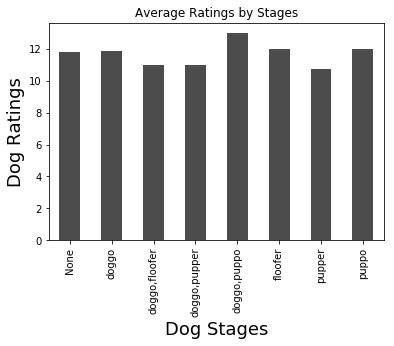

In [43]:
#bar graph for the average rating of the dog stages
colors = ['black']
twitter_archive_master.groupby('dog_stages')['rating_numerator'].mean().plot(kind='bar', title='Average Ratings by Stages', color=colors, alpha=.7);
plt.xlabel('Dog Stages', fontsize=18)
plt.ylabel('Dog Ratings', fontsize=18);


#### From the graph, we can say the following on the overall ratings of the dog stages;
* we can see that pupper stage received the lowest overall rating.
* while the doggo-puppo received the highest overall rating.

### 2. What is the relation between Retweet Count and Favorite Count?

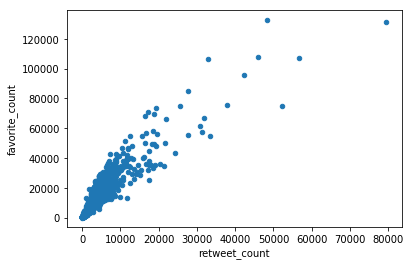

In [44]:
#scatter plot
twitter_archive_master.plot(x='retweet_count', y= 'favorite_count', kind = 'scatter');


#### From the graph, we can say the following;
* It is a positive correlation the relationship between Retweet Count and Favorite Count.
* The graph is mostly dense between 0-20,000 in Retweet Counts and 0-60,000 in Favorite Count.

### 3. How is the average favorite count between different dog stages?

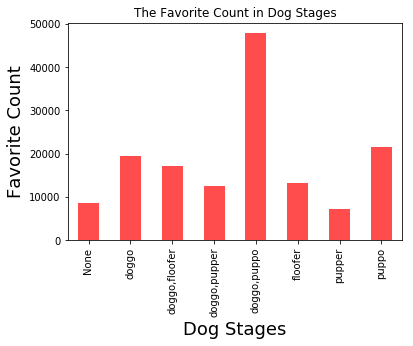

In [45]:
#bar graph for the average favorite count between different dog stages
colors = ['red']
twitter_archive_master.groupby('dog_stages')['favorite_count'].mean().plot(kind='bar', title='The Favorite Count in Dog Stages', color=colors, alpha=.7);
plt.xlabel('Dog Stages', fontsize=18)
plt.ylabel('Favorite Count', fontsize=18);

##### From the graph above we can see;
* The doggopuppo stage received the most favorite count, 40,000-50,000.
* The pupper stage received the least favorite count <10,000.
* The doggo, doggopupper, floofer and flooferdoggo stages received between 10,000-20,000.
* The puppo stage received between 20,000-30,000.

### 4. Which dog stage has many favorite count?

In [46]:
#Codes for grouping the dog stages with favorite count
twitter_archive_master.groupby('dog_stages')['favorite_count'].count()

dog_stages
None             1670
doggo              63
doggo,floofer       1
doggo,pupper        9
doggo,puppo         1
floofer             7
pupper            203
puppo              22
Name: favorite_count, dtype: int64

##### From the above information we can see that;

* pupper stage received the most favorite count of 202.
* doggo stage being the second received favorite count of 63.
* puppo stage received favorite count of 22.
* doggopupper stage received favorite count of 9.
* floofer stage received favorite count of 7.
* doggopuppo and flooferdoggo stages received favorite count of 1 for each.

##### Coclusion for our question:
As we can see the pupper received the most favorite count than any other stages.